## Sampling For Data Science

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Random Sampling in Python
he numpy.random package has several functions that we could use to simulate random sampling. In this exercise, we’ll use the function ``np.random.choice()``, which generates a sample of some size from a given array.

In the example code, we’ll pretend that we’re all-powerful and actually have a list of all the weights of Atlantic Salmon that currently exist.

In [6]:
population = pd.read_csv("salmon_population.csv")
population.head()

,Salmon_Weight
0,3.275205
1,84.000717
2,17.127989
3,68.628082
4,51.100461


In [7]:
population = np.array(population["Salmon_Weight"])
pop_mean = round(np.mean(population), 3)

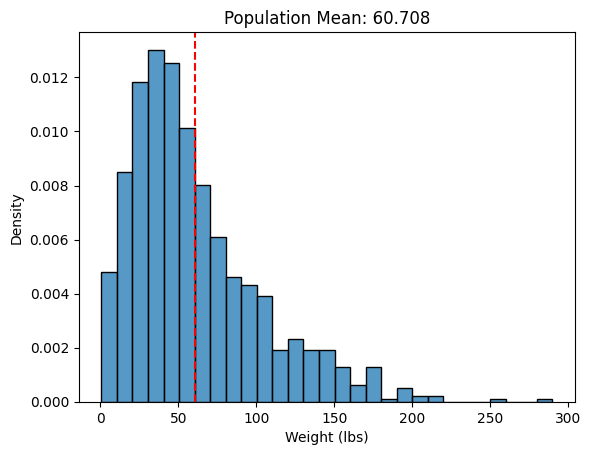

In [16]:
# Plotting the population distribution
sns.histplot(population,  stat = "density")
plt.axvline(pop_mean, color = "r", linestyle = "dashed")
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

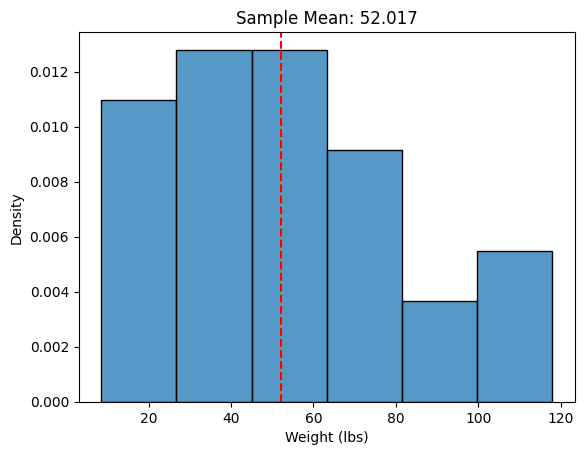

In [28]:
# Generate our random sample below
samp_size = 30
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = round(np.mean(sample), 3)

sns.histplot(sample, stat="density")
plt.axvline(sample_mean, color = "r", linestyle = "dashed")
plt.title(f"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

### 2. Sampling Distributions
As we saw in the last example, each time we sample from a population, we will get a slightly different sample mean. In order to understand how much variation we can expect in those sample means, we can do the following:

- Take a bunch of random samples of fish, each of the same size (50 fish in this example)
- Calculate the sample mean for each one
- Plot a histogram of all the sample means

This process gives us an estimate of the sampling distribution of the mean for a sample size of 50 fish.

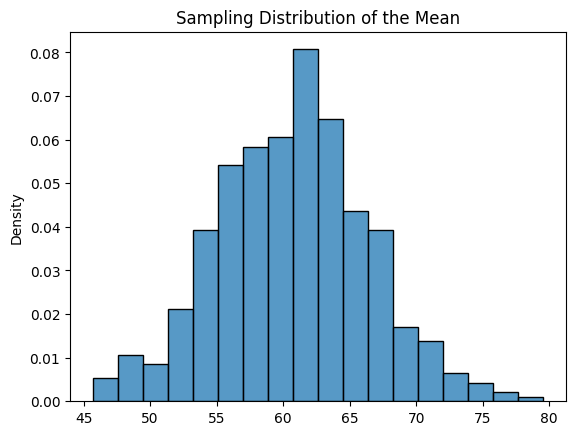

In [37]:
population = pd.read_csv("salmon_population.csv")

salmon_population = population["Salmon_Weight"]
sample_size = 50
sample_means = []

# Loop 500 times to get 500 random sample means
for i in range(500):
    # Take a sample from the data:
    samp = np.random.choice(salmon_population, sample_size, replace = False)
    # Calculate the mean of this sample:
    this_sample_mean = np.mean(samp)
    # Append this sample mean to a list of sample means
    sample_means.append(this_sample_mean)
    
# Plot all the sample means to show the sampling distribution
sns.histplot(sample_means, stat = "density")
plt.title("Sampling Distribution of the Mean")
plt.show()

### 3. Central Limit Theorem
- The Central Limit Theorem (CLT) allows us to specifically describe the sampling distribution of the mean.


- The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. Using a sample size of n > 30 is usually a good rule of thumb, regardless of what the distribution of the population is like. If the distribution of the population is normal, the sample size can be smaller than that


- Note that the CLT only applies to the sampling distribution of the mean and not other statistics like maximum, minimum, and variance!

In [38]:
cod_population = pd.read_csv("cod_population.csv")
cod_population.head()

,Cod_Weight
0,19.525484
1,58.577148
2,8.270952
3,43.375040
4,35.406281


In [39]:
population = cod_population["Cod_Weight"]

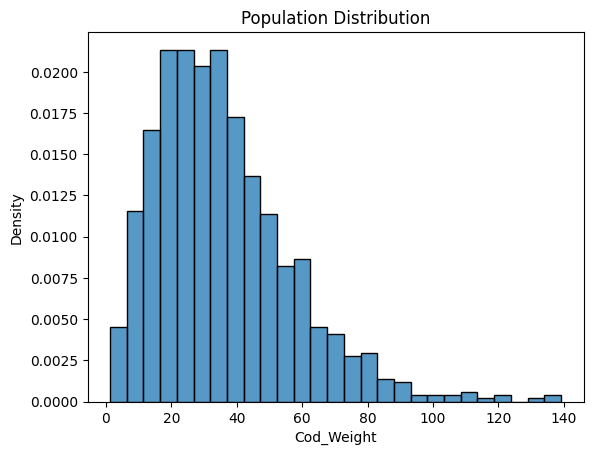

In [40]:
sns.histplot(population, stat = "density")
plt.title("Population Distribution")
plt.show()

**Now that we have seen the skewed population distribution, let’s simulate a sampling distribution of the mean. According to the CLT, we will see a normal distribution once the sampling size is large enough. To start, we have set the sample size to 6.**

In [55]:
sample_means = []
samp_size = 6
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

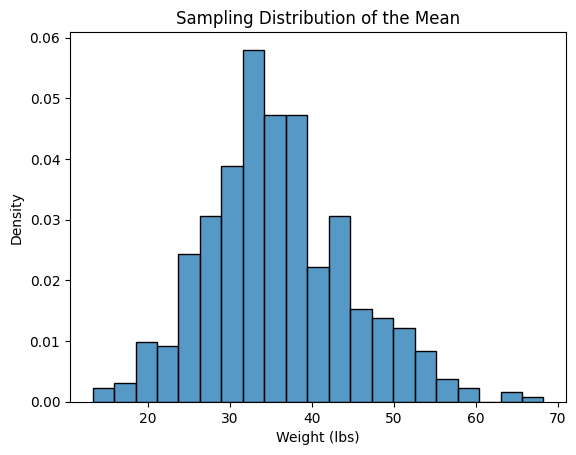

In [56]:
sns.histplot(sample_means, stat = "density")
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

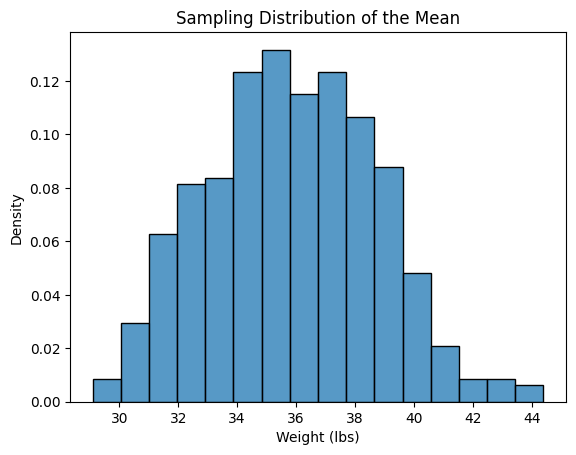

In [57]:
sample_means = []
samp_size = 50
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)
    
sns.histplot(sample_means, stat = "density")
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

### 4. Standard Error
The second part of the Central Limit Theorem is:

- The sampling distribution of the mean is normally distributed, with standard deviation equal to the population standard deviation divided by the square root of the sample size.

- The standard deviation of a sampling distribution is also known as the standard error of the estimate of the mean. In many instances, we cannot know the population standard deviation, so we estimate the standard error using the sample standard deviation

Two important things to note that:
- As sample size increases, the standard error will decrease.
- As the population standard deviation increases, so will the standard error.

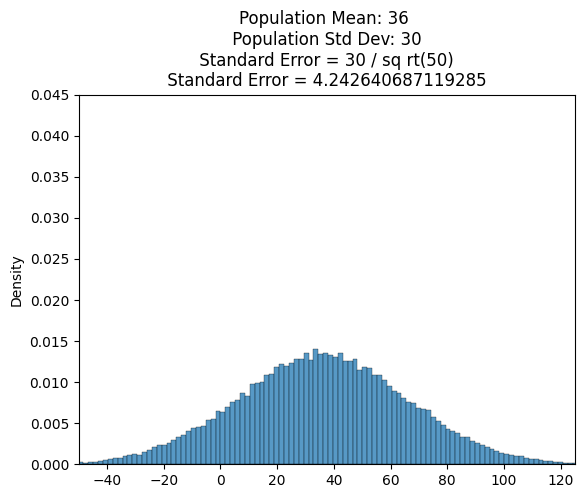

In [60]:
population_mean = 36
population_std_dev = 30
# Set the sample size:
samp_size = 50

### Below is code to create simulated dataset and calculate Standard Error

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

## Simulate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()

In [62]:
import scipy.stats as stats

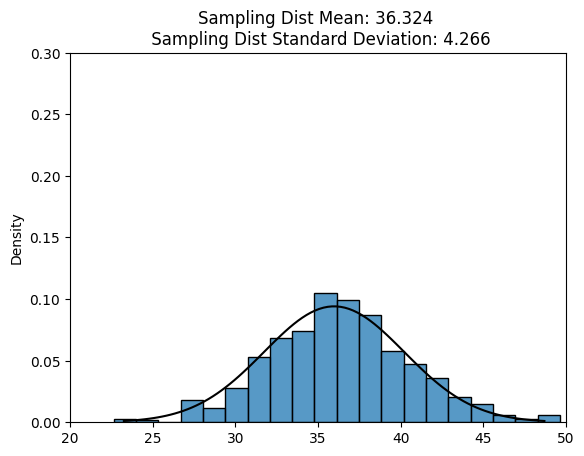

In [63]:
## Plot the sampling distribution
sns.histplot(sample_means, stat = 'density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
# plt.axvline(mean_sampling_distribution,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()

### 5. Biased Estimators
According to the Central Limit Theorem, the mean of the sampling distribution of the mean is equal to the population mean. This is the case for some, but not all, sampling distributions. Remember, you can have a sampling distribution for any sample statistic, including:

- mean
- median
- max / min
- variance

Because the mean of the sampling distribution of the mean is equal to the mean of the population, we call it an unbiased estimator. A statistic is called an unbiased estimator of a population parameter if the mean of the sampling distribution of the statistic is equal to the value of the statistic for the population.

The maximum is one example of a biased estimator, meaning that the mean of the sampling distribution of the maximum is not centered at the population maximum.

#### a. For maximum

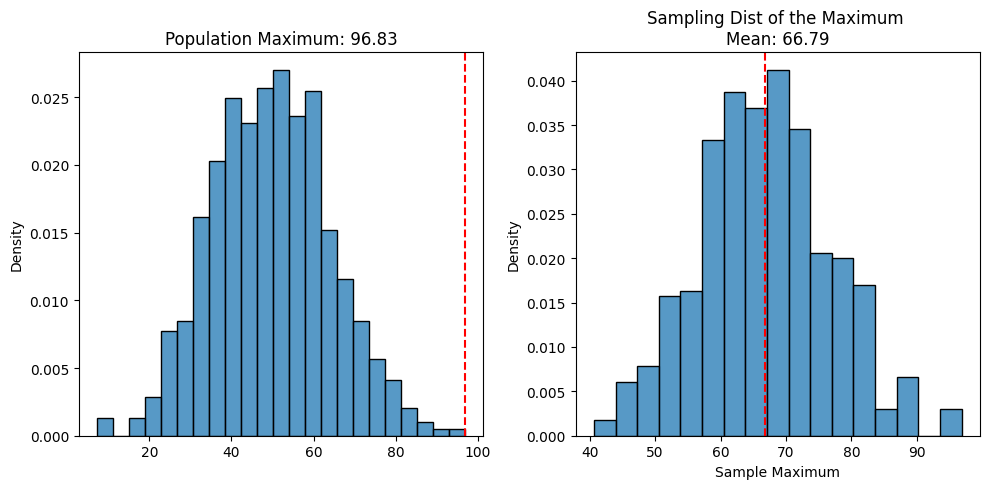

In [70]:
app_stat_text = "Maximum"
def app_statistic(x):
    return np.max(x)

### Below calculates the statistic for this population:
### You don't need to change anything below to pass the checkpoints
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")

plt.subplot(1,2,2)
sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")

plt.tight_layout()
plt.show()

**You can see the sampling distribution of the maximum. The mean of the distribution is not equal to the maximum of the population, showing that it is a ``biased estimator``.**

#### b. For variance

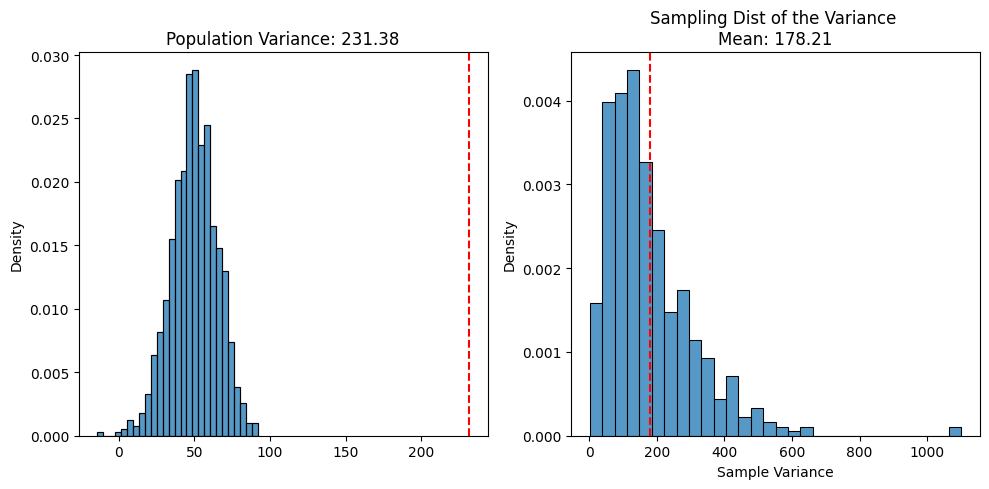

In [72]:
app_stat_text = "Variance"
def app_statistic(x):
    return np.var(x)

### Below calculates the statistic for this population:
### You don't need to change anything below to pass the checkpoints
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")

plt.subplot(1,2,2)
sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")

plt.tight_layout()
plt.show()

**Based on the resulting mean of the sampling distribution, we can say that variance is a ``biased estimator``.**

#### c. For mean

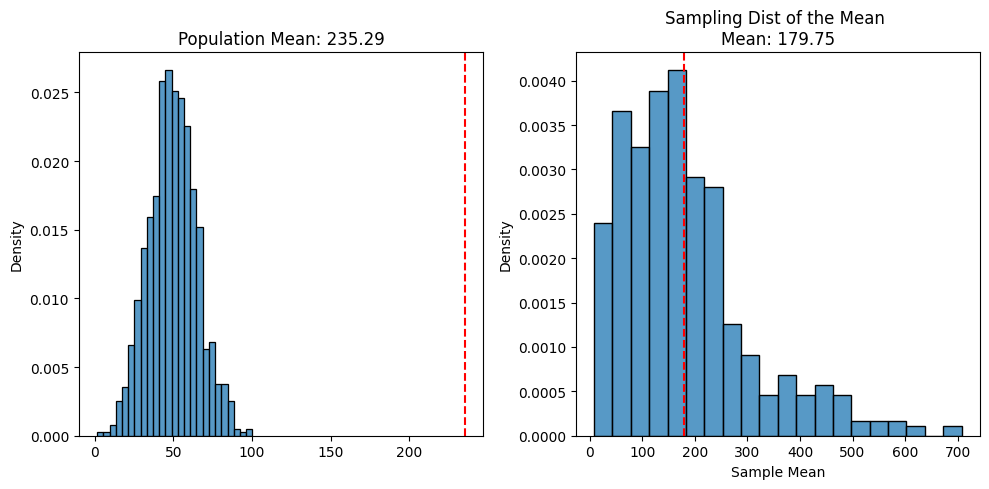

In [73]:
app_stat_text = "Mean"
def app_statistic(x):
    return np.var(x)

### Below calculates the statistic for this population:
### You don't need to change anything below to pass the checkpoints
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")

plt.subplot(1,2,2)
sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")

plt.tight_layout()
plt.show()

**Based on the resulting mean of the sampling distribution, we can say that variance is an ``unbiased estimator``.**

### 6. Calculating Probabilities
- Once we know the sampling distribution of the mean, we can also use it to estimate the probability of observing a particular range of sample means, given some information (either known or assumed) about the population. To do this, we can use the ``Cumulative Distribution Function``, or (CDF) of the normal distribution.


- Let’s work through this with our salmon fish example. Let’s say we are transporting the salmon and want to make sure the crate we carry the fish in will be strong enough to hold the weight.

    - Suppose we estimate that the salmon population has an average weight of 60 lbs with a standard deviation of 40 lbs.
    - We have a crate that supports 750 lbs, and we want to be able to transport 10 fish at a time.
    - We want to calculate the probability that the average weight of those 10 fish is less than or equal to 75 (750/10).
  
  
- Using the CLT, we first estimate that the mean weight of 10 randomly sampled salmon from this population is normally distributed with mean = 60 and standard error = 40/10^.5. Then, we can use this probability distribution to calculate the probability that 10 randomly sampled fish will have a mean weight less than or equal to 75.

In [80]:
x = 75
mean = 60
std_dev = 40
samp_size = 10
standard_error = std_dev / (samp_size ** 0.5)

stats.norm.cdf(x, mean, standard_error)
# Probability of 88.2% that the average weight of our sample of 10 fish will be less than or equal to 75.

0.8821600432854813

### 7. Review
- A sampling distribution is obtained by taking a random sample of a certain size multiple times, taking a sample statistic, and plotting the distribution of this sample statistic.


- The Central Limit Theorem establishes that the sampling distribution of the mean will be normally distributed (even if the original population was not normally distributed).


- A statistic is called an unbiased estimator of a population parameter if the mean of the sampling distribution of the statistic is equal to the value of the statistic for the population. The mean is an unbiased estimator.


- We can use the Standard Error of our sample mean distribution in order to calculate probabilities of obtaining a sample with a certain statistic using the CDF.

#### Exercise
Let’s consider an example from a restaurant serving quarter-pounder burgers. Their quarter-pounders weigh an average of 0.25 lbs with a standard deviation of 0.2 lbs.

Let’s say we weigh all their burgers that they cook for dinner on a given night. 64 people order quarter-pounders. What is the probability that the mean will be 0.24 lbs or less?

In [82]:
samp_size = 64
population_mean = 0.25
population_std_dev = 0.2
x = 0.24

standard_error = population_std_dev / (samp_size ** 0.5)

stats.norm.cdf(x, population_mean, standard_error)

0.3445782583896757